In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [353]:
data=pd.read_csv('Auto_Insurance_Fraud.csv')

In [356]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [355]:
data.shape

(1000, 40)

In [259]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

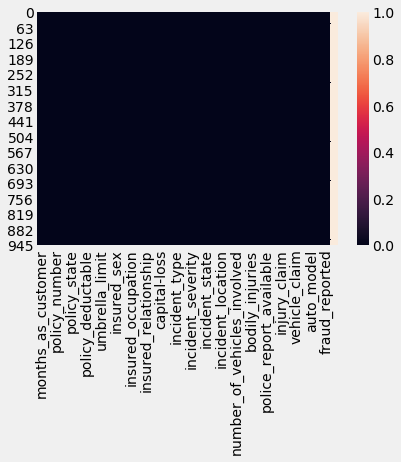

In [261]:
#To check missing value
sns.heatmap(data.isnull())

In [362]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
fraud_reported                 0
dtype: int64

In [363]:
#Check Duplicate
data.duplicated().sum()

0

In [359]:
# dropping unimportant columns
data=data.drop(columns = [
    'policy_number',
    'policy_bind_date',
    'policy_state',
    'policy_csl',
    'police_report_available',
    'auto_make',
    'auto_model',
    'umbrella_limit',
    '_c39',
    'incident_date',
    'insured_zip'
    ])

In [360]:
data.shape

(1000, 29)

In [361]:
data.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,53300,...,1,YES,1,2,71610,6510,13020,52080,2004,Y
1,228,42,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,0,...,1,?,0,0,5070,780,780,3510,2007,Y
2,134,29,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,35100,...,3,NO,2,3,34650,7700,3850,23100,2007,N
3,256,41,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,48900,...,1,?,1,2,63400,6340,6340,50720,2014,Y
4,228,44,1000,1583.91,MALE,Associate,sales,board-games,unmarried,66000,...,1,NO,0,1,6500,1300,650,4550,2009,N


In [364]:
data.insured_sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [366]:
data.property_damage.unique()

array(['YES', '?', 'NO'], dtype=object)

In [367]:
data.nunique()

months_as_customer              391
age                              46
policy_deductable                 3
policy_annual_premium           991
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                         4
total_claim_amount              763
injury_claim                    638
property_claim                  626
vehicle_claim                   726
auto_year                   

In [368]:
# identify variables with '?' values
unknowns = {}
for i in list(data.columns):
    if (data[i]).dtype == object:
        j = np.sum(data[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
fraud_reported             0


In [369]:
data.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

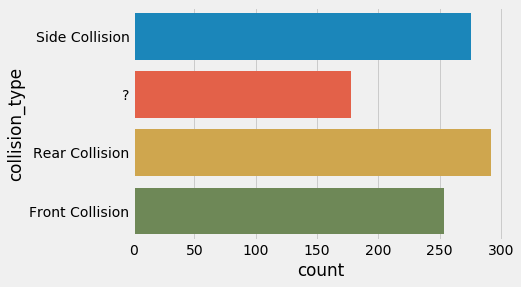

In [372]:
sns.countplot(y='collision_type',data=data)

In [373]:
data.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

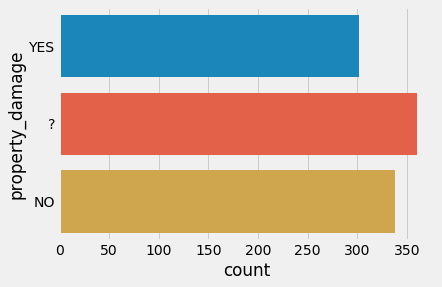

In [374]:
sns.countplot(y='property_damage',data=data)

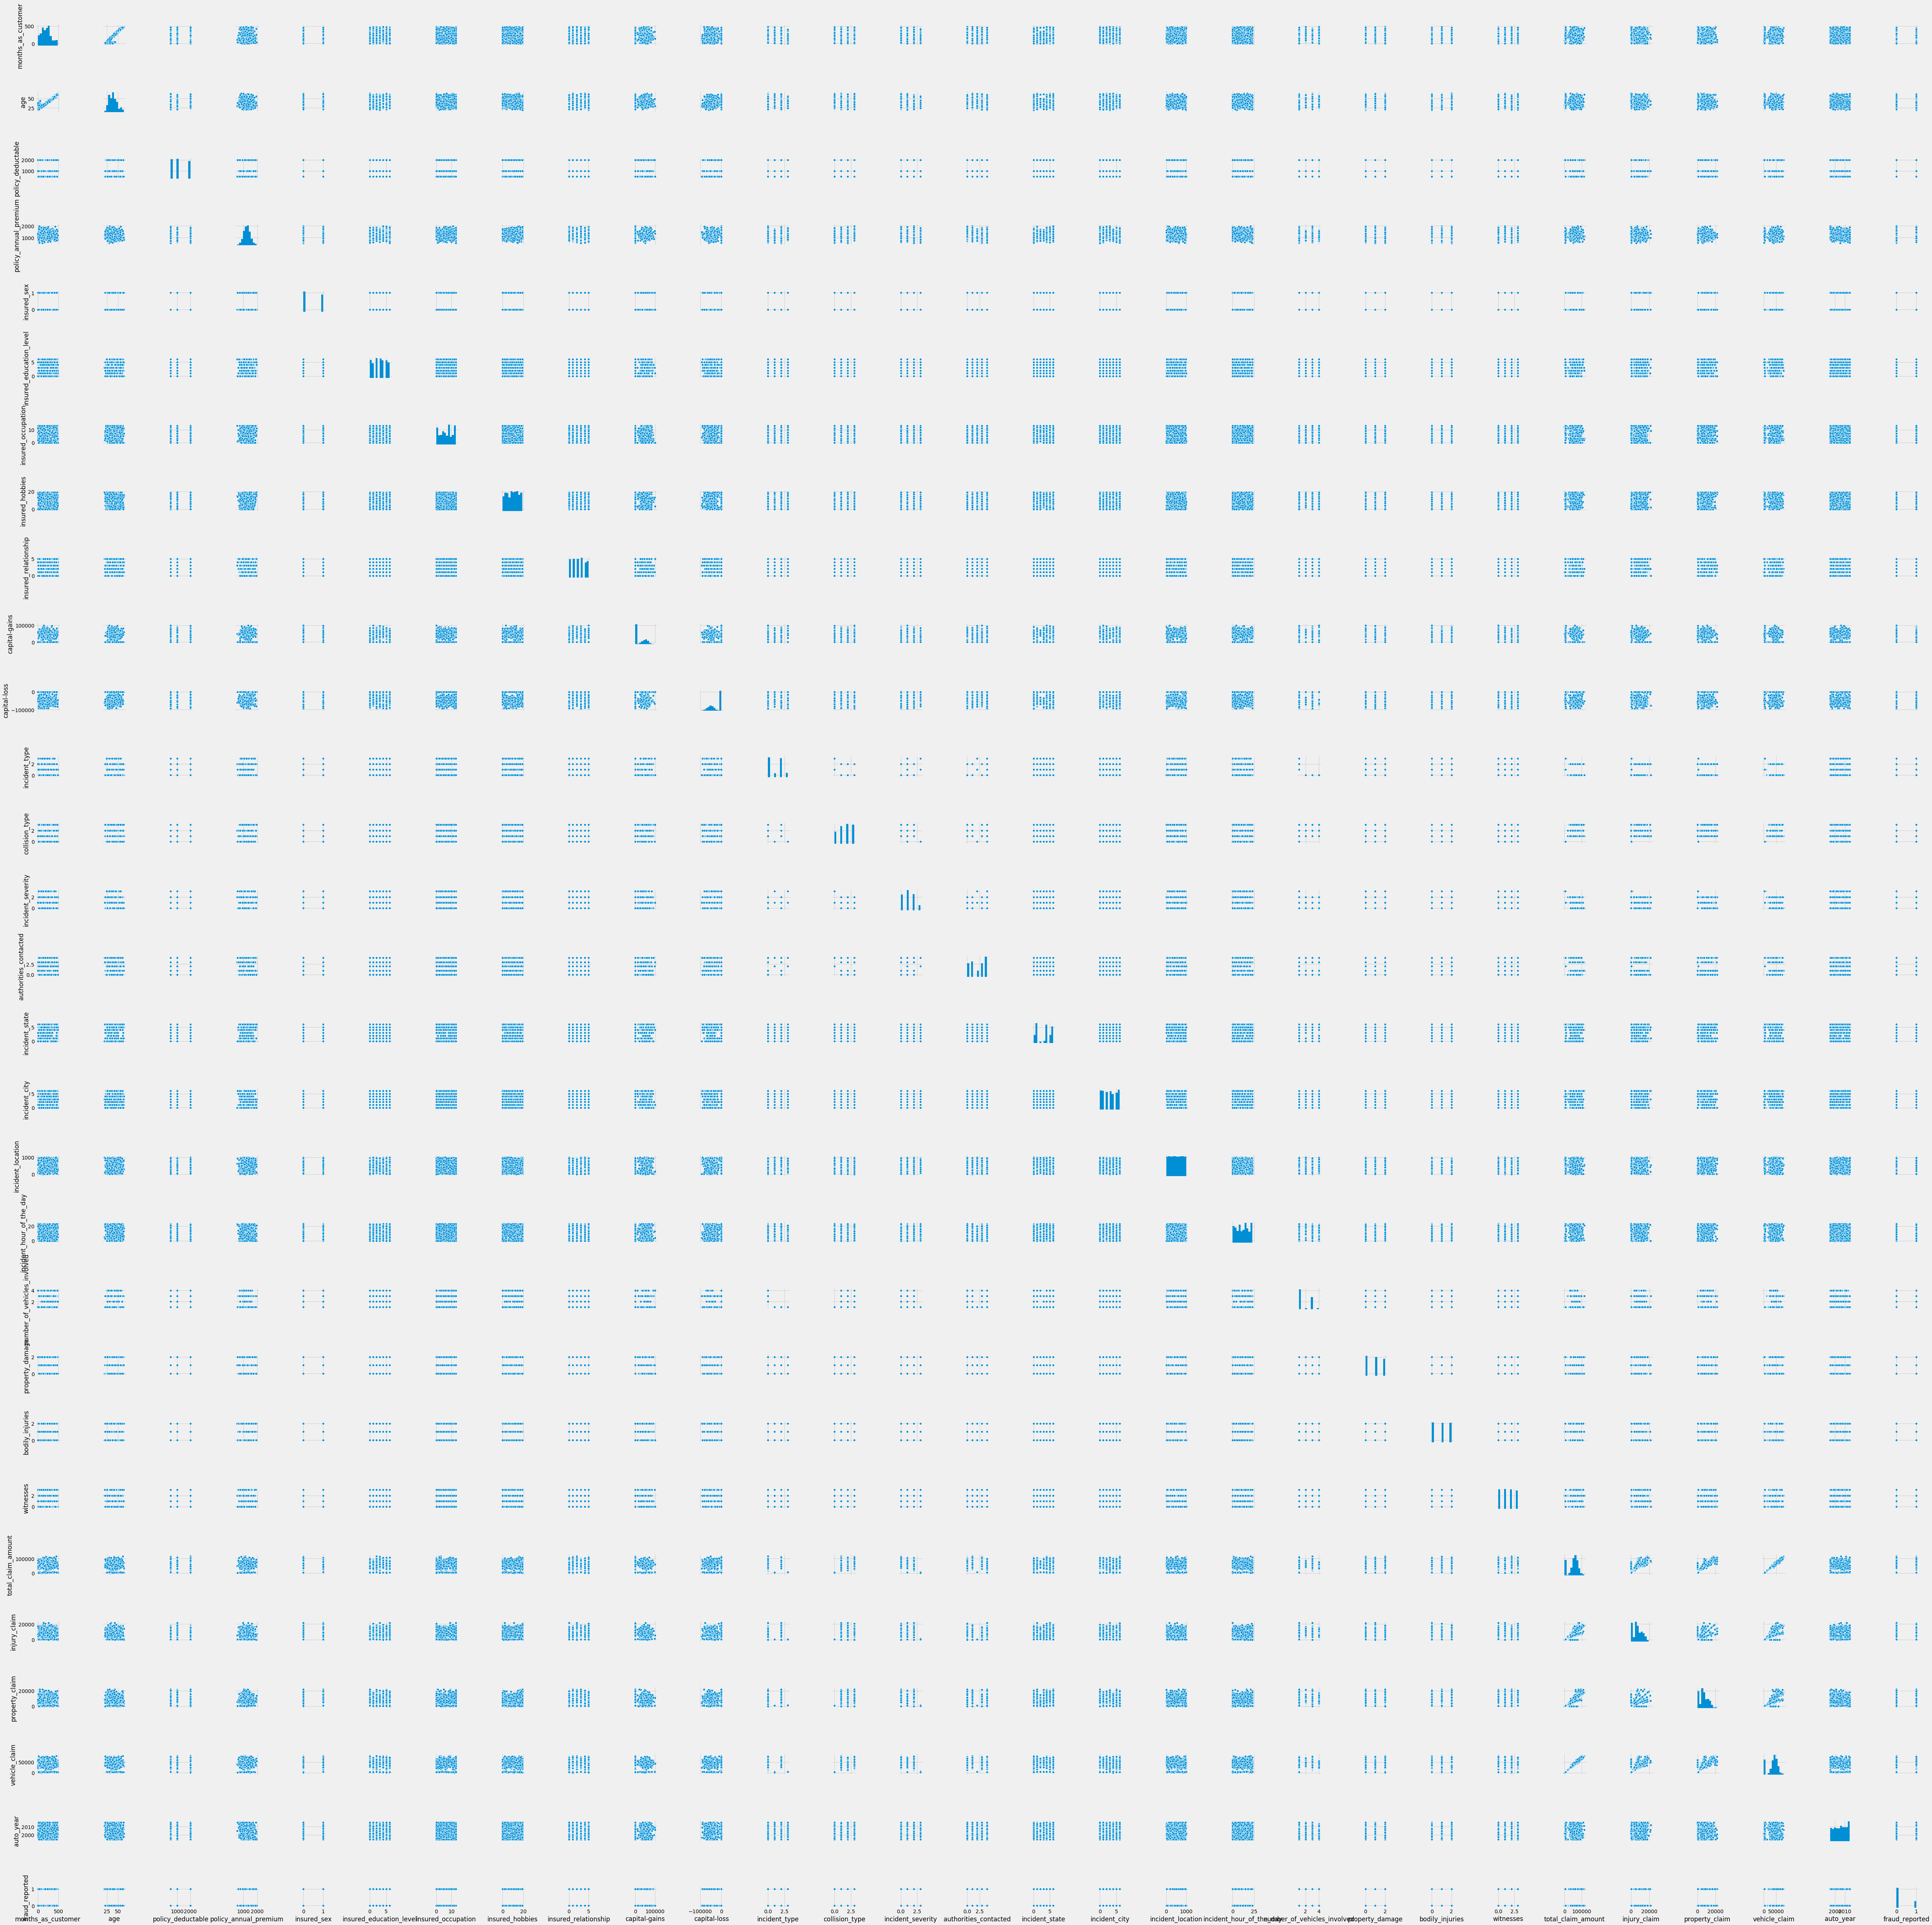

In [409]:
sns.pairplot(data)

Label Encoding

In [375]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [376]:
for col in data.columns:
    dtype=data[col].dtypes
    if dtype=='object':
        le=LabelEncoder()
        data[col]=le.fit_transform(data[col])

In [377]:
data.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,1000,1406.91,1,4,2,17,0,53300,...,1,2,1,2,71610,6510,13020,52080,2004,1
1,228,42,2000,1197.22,1,4,6,15,2,0,...,1,0,0,0,5070,780,780,3510,2007,1
2,134,29,2000,1413.14,0,6,11,2,3,35100,...,3,1,2,3,34650,7700,3850,23100,2007,0
3,256,41,2000,1415.74,0,6,1,2,4,48900,...,1,0,1,2,63400,6340,6340,50720,2014,1
4,228,44,1000,1583.91,1,0,11,2,4,66000,...,1,1,0,1,6500,1300,650,4550,2009,0


In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
insured_sex                    1000 non-null int32
insured_education_level        1000 non-null int32
insured_occupation             1000 non-null int32
insured_hobbies                1000 non-null int32
insured_relationship           1000 non-null int32
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null int32
collision_type                 1000 non-null int32
incident_severity              1000 non-null int32
authorities_contacted          1000 non-null int32
incident_state                 1000 non-null int32
incident_city                  1000 non-null int32
incident_location        

In [380]:
# Checking numeric columns
data._get_numeric_data().head()  

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,1000,1406.91,1,4,2,17,0,53300,...,1,2,1,2,71610,6510,13020,52080,2004,1
1,228,42,2000,1197.22,1,4,6,15,2,0,...,1,0,0,0,5070,780,780,3510,2007,1
2,134,29,2000,1413.14,0,6,11,2,3,35100,...,3,1,2,3,34650,7700,3850,23100,2007,0
3,256,41,2000,1415.74,0,6,1,2,4,48900,...,1,0,1,2,63400,6340,6340,50720,2014,1
4,228,44,1000,1583.91,1,0,11,2,4,66000,...,1,1,0,1,6500,1300,650,4550,2009,0


In [381]:
data._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

In [382]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,...,1.83900,0.94200,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,611.864673,244.167395,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,...,1.01888,0.81197,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,500.000000,433.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,...,1.00000,0.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,...,1.00000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,2000.000000,1415.695000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,...,3.00000,2.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,...,4.00000,2.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


In [383]:
data.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,...,0.014736,0.007040,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.029188,0.014404,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,...,0.022102,-0.001486,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_deductable,0.026807,0.029188,1.000000,-0.003245,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,...,0.051214,0.016900,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,...,-0.045991,0.095359,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
insured_sex,0.060925,0.073337,-0.009733,0.038853,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,...,0.018793,0.029293,-0.020297,0.042463,-0.023727,0.000924,-0.014868,-0.029609,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,0.015217,-0.019715,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,...,-0.003768,-0.025290,-0.012072,0.019211,0.074226,0.081880,0.055794,0.068348,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.046733,0.035922,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,...,-0.015368,0.010697,-0.000236,-0.014794,0.003692,0.020211,0.003004,-0.000829,-0.006676,0.001564
insured_hobbies,-0.093661,-0.081315,0.004061,-0.018019,-0.020317,0.021807,-0.011077,1.000000,-0.096772,0.054338,...,0.012586,0.033763,0.031373,-0.033971,-0.004488,0.028393,0.012535,-0.016814,-0.014495,-0.046838
insured_relationship,0.069727,0.074832,-0.022945,0.001925,0.002855,-0.023488,-0.010171,-0.096772,1.000000,-0.019439,...,-0.047354,-0.036575,-0.001214,0.002362,0.002229,0.029014,0.007332,-0.006256,-0.023345,0.021043
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.020494,0.039912,-0.007824,0.054338,-0.019439,1.000000,...,0.061643,0.023921,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173


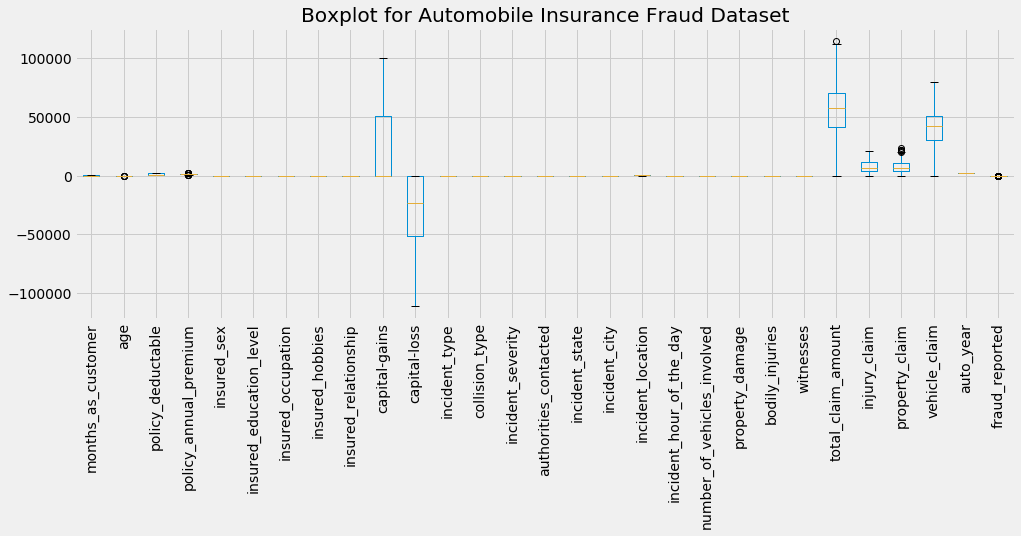

In [384]:
data.plot(kind='box',grid=True,title="Boxplot for Automobile Insurance Fraud Dataset",legend=True,rot=90,figsize=(15,5))

In [385]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data=data.loc[(z_score < 3).all(axis=1)]
print(data.shape)

(1000, 29)
(995, 29)


In [316]:
data.skew()

months_as_customer             0.358958
age                            0.473974
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.193075
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_location              0.000429
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.099513
bodily_injuries                0.012979
witnesses                      0.027371
total_claim_amount            -0.591848
injury_claim                   0.270253


In [317]:
for col in data.columns:
    if data.skew().loc[col] > 0.55:
        data[col]=np.log1p(data[col])
    if data.skew().loc[col]<=0.55:
        data[col]=np.log1p(data[col])

In [318]:
data.skew()

months_as_customer            -1.900510
age                           -0.034590
policy_deductable              0.062486
policy_annual_premium         -0.572494
insured_sex                    0.143294
insured_education_level       -0.781801
insured_occupation            -1.048716
insured_hobbies               -1.218686
insured_relationship          -0.623566
capital-gains                  0.045547
capital-loss                   0.000000
incident_type                 -0.139008
collision_type                -0.752919
incident_severity             -0.318247
authorities_contacted         -0.583946
incident_state                -0.649056
incident_city                 -0.673538
incident_location             -1.863288
incident_hour_of_the_day      -1.267629
number_of_vehicles_involved    0.421564
property_damage               -0.210608
bodily_injuries               -0.290317
witnesses                     -0.458379
total_claim_amount            -1.661977
injury_claim                  -3.156876


Features and Target Value

In [386]:
x=data.drop("fraud_reported",axis=1)
y=data["fraud_reported"]

In [387]:
x.head(2)

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,1,4,2,17,0,53300,...,5,1,2,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,1,4,6,15,2,0,...,8,1,0,0,0,5070,780,780,3510,2007


In [388]:
y.head(2)

0    1
1    1
Name: fraud_reported, dtype: int32

In [389]:
y=y.round().astype(int)
y.unique()

array([1, 0], dtype=int64)

In [390]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(995, 1)

Standardisation

In [391]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 1.07398371,  0.98659211, -0.22341693, ...,  1.17550821,
         0.75084629, -0.18419417],
       [ 0.20458414,  0.33018345,  1.41114078, ..., -1.37594025,
        -1.82287194,  0.31518785],
       [-0.61265146, -1.09203531,  1.41114078, ..., -0.73599362,
        -0.78480029,  0.31518785],
       ...,
       [-0.64742744, -0.5450281 , -1.04069579, ...,  0.02485498,
         0.77310204, -1.51587958],
       [ 2.20420315,  2.51821232,  1.41114078, ..., -0.45041483,
        -0.07261637, -1.18295823],
       [ 2.18681516,  2.29940944, -0.22341693, ..., -1.34675702,
        -1.81386366,  0.31518785]])

Spilt Train and Test

In [392]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [393]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    #print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state

Logistic Regression

random_state for mod  is  65 which gives accuracy score of:  0.8193979933110368
confusion matrix:  [[205  26]
 [ 47  21]]
classification report:                precision    recall  f1-score   support

           0       0.81      0.89      0.85       231
           1       0.45      0.31      0.37        68

    accuracy                           0.76       299
   macro avg       0.63      0.60      0.61       299
weighted avg       0.73      0.76      0.74       299

fpr:  [0.         0.11255411 1.        ]
tpr:  [0.         0.30882353 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.5981347084288261

prediction:  [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0

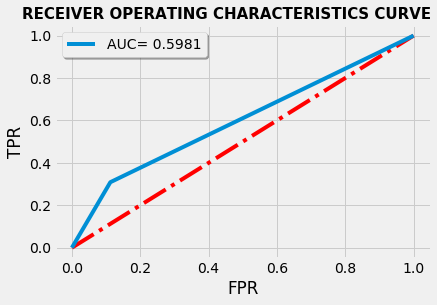

In [394]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [395]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.7789655741084313

DecisionTree

In [396]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 3}

random_state for mod  is  26 which gives accuracy score of:  0.882943143812709
confusion matrix:  [[190  41]
 [  8  60]]
classification report:                precision    recall  f1-score   support

           0       0.96      0.82      0.89       231
           1       0.59      0.88      0.71        68

    accuracy                           0.84       299
   macro avg       0.78      0.85      0.80       299
weighted avg       0.88      0.84      0.85       299

fpr:  [0.         0.17748918 1.        ]
tpr:  [0.         0.88235294 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.8524318818436465

prediction:  [0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 1 0 0 

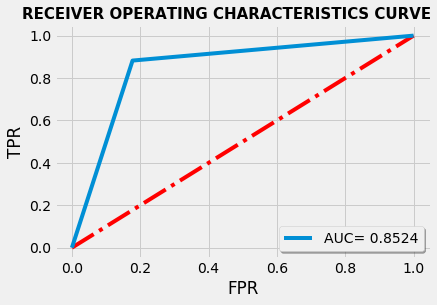

In [397]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc=rst(dt,x,y)

In [398]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=15).mean()
accuracy_score_3

0.8383038189008337

GaussianNB

random_state for mod  is  76 which gives accuracy score of:  0.7759197324414716
confusion matrix:  [[157  74]
 [ 28  40]]
classification report:                precision    recall  f1-score   support

           0       0.85      0.68      0.75       231
           1       0.35      0.59      0.44        68

    accuracy                           0.66       299
   macro avg       0.60      0.63      0.60       299
weighted avg       0.74      0.66      0.68       299

fpr:  [0.         0.32034632 1.        ]
tpr:  [0.         0.58823529 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6339444868856634

prediction:  [0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0

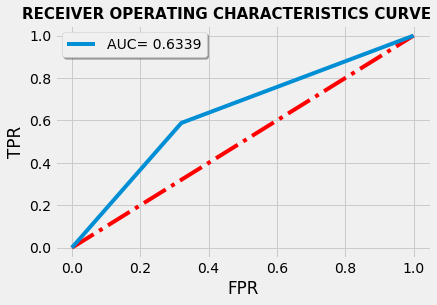

In [399]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [400]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=5).mean()
accuracy_score_4

0.702515049997462

KNN

In [401]:
kn=KNeighborsClassifier()
kn_param={'n_neighbors':range(1,10),'leaf_size':range(20,70)}
kn_g=GridSearchCV(kn,kn_param,cv=15)
kn_g.fit(x,y)
kn_g.best_params_

{'leaf_size': 20, 'n_neighbors': 6}

random_state for mod  is  28 which gives accuracy score of:  0.802675585284281
confusion matrix:  [[223   8]
 [ 62   6]]
classification report:                precision    recall  f1-score   support

           0       0.78      0.97      0.86       231
           1       0.43      0.09      0.15        68

    accuracy                           0.77       299
   macro avg       0.61      0.53      0.51       299
weighted avg       0.70      0.77      0.70       299

fpr:  [0.         0.03463203 1.        ]
tpr:  [0.         0.08823529 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.5268016297428061

prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 

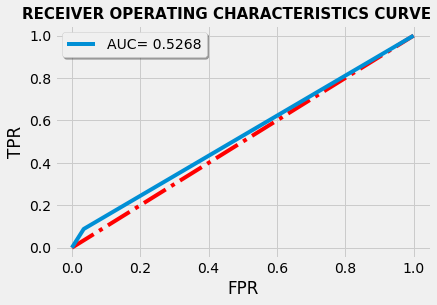

In [402]:
kn=KNeighborsClassifier(n_neighbors=6,leaf_size=20)
knn=rst(kn,x,y)

In [403]:
#Cross Validation
accuracy_score_5=cross_val_score(kn,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_5

0.7498029272314988

Gradient Boosting

In [405]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

best parameters: {'learning_rate': 0.1, 'n_estimators': 1000}

 best score: 0.8103448275862069


random_state for mod  is  97 which gives accuracy score of:  0.8695652173913043
confusion matrix:  [[200  31]
 [ 25  43]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.87      0.88       231
           1       0.58      0.63      0.61        68

    accuracy                           0.81       299
   macro avg       0.73      0.75      0.74       299
weighted avg       0.82      0.81      0.82       299

fpr:  [0.         0.13419913 1.        ]
tpr:  [0.         0.63235294 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7490769034886682

prediction:  [0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 1 0 0

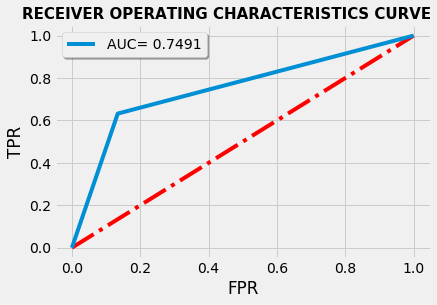

In [406]:
gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators= 1000)
gbc=rst(gb,x,y)

In [407]:
#Cross Validation
accuracy_score_6=cross_val_score(gb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_6

0.8241168831168831

In [408]:
import joblib
joblib.dump(lr,"LR_InsuranceFraud.pkl")

['LR_InsuranceFraud.pkl']